# Exploring the UTx000 Extension Beacon Data
(Known as BPEACE2 in the [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Summary
This notebook helps look at the measurements taken during the study period for the various sensors on the beacons.

# Package Import

In [33]:
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

# Data Import

In [34]:
beacon_data = pd.read_csv('../data/processed/bpeace2-beacon.csv',index_col=0,parse_dates=True)
# show it off:
beacon_data.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_4,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,Beacon,Beiwe,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-08 00:00:00,537.88,990.12,0.0,0.0,0.0,74.64,28.0,36.80,-0.68488,28.0,...,39.961129,40.164481,4.925515,11.135812,15.932873,16.892285,1,kyj367pi,24,10
2020-06-08 00:05:00,537.70,1006.65,0.0,0.0,0.0,75.85,28.0,37.00,-0.52275,28.0,...,32.546536,32.691019,4.020243,8.442126,11.833886,12.512238,1,kyj367pi,24,10
2020-06-08 00:10:00,537.64,1020.24,0.0,0.0,0.0,76.56,28.0,37.00,-0.78328,28.0,...,34.809603,34.927838,4.314605,7.951792,10.694790,11.243390,1,kyj367pi,24,10
2020-06-08 00:15:00,542.40,1080.52,0.0,0.0,0.0,74.52,28.0,36.28,-0.83856,28.0,...,40.619122,40.779581,5.025503,9.946487,13.695432,14.445220,1,kyj367pi,24,10
2020-06-08 00:20:00,541.04,1093.04,0.0,0.0,0.0,74.92,28.0,36.40,-0.48872,28.0,...,37.065600,37.242149,4.573548,9.970680,14.125998,14.957063,1,kyj367pi,24,10


## Base Visualization
Here we look at the raw, unaltered data in order to ascertain:
- what data are available? (see 4.1.1 notebook to see when participants actually measured data)
- what are typical measurements and what does this say?
- are there any misbehaving sensors?

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.colors import LogNorm

### Heatmap

In [55]:
data_by_beacon

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_2p5,PM_N_4,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,Beacon,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-10 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-10 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-10 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-10 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 20:00:00,285.385833,1388.037500,0.7616,5461.76,0.083333,81.069167,28.850000,46.155833,-5.734254,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,-1.0,0.0
2020-09-01 21:00:00,272.600833,1388.182500,0.0000,0.00,0.000000,77.302500,28.915833,47.996667,-5.796800,30.036667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,-1.0,0.0
2020-09-01 22:00:00,288.355000,1418.835833,0.0000,0.00,0.000000,71.773333,28.253333,50.150833,-5.530871,29.883333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,-1.0,0.0


Working for PM_C_2p5
	Data collected
	Plotting


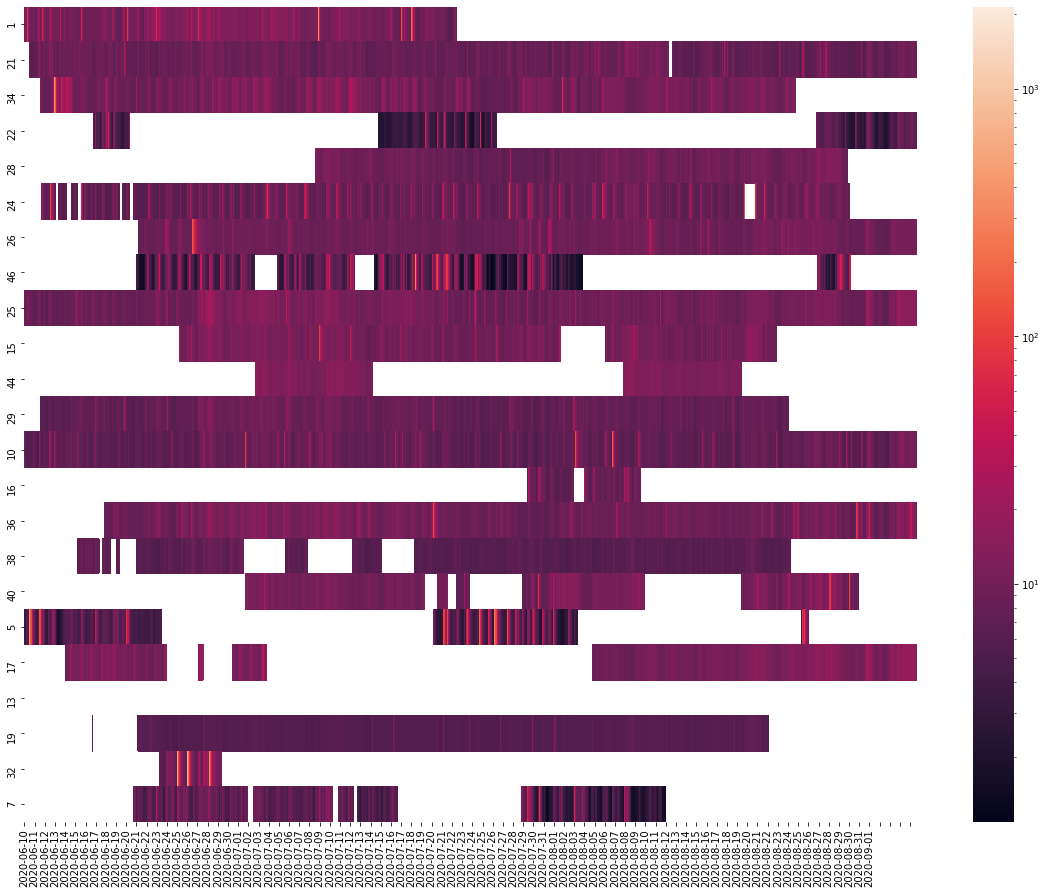

Working for CO2
	Data collected
	Plotting


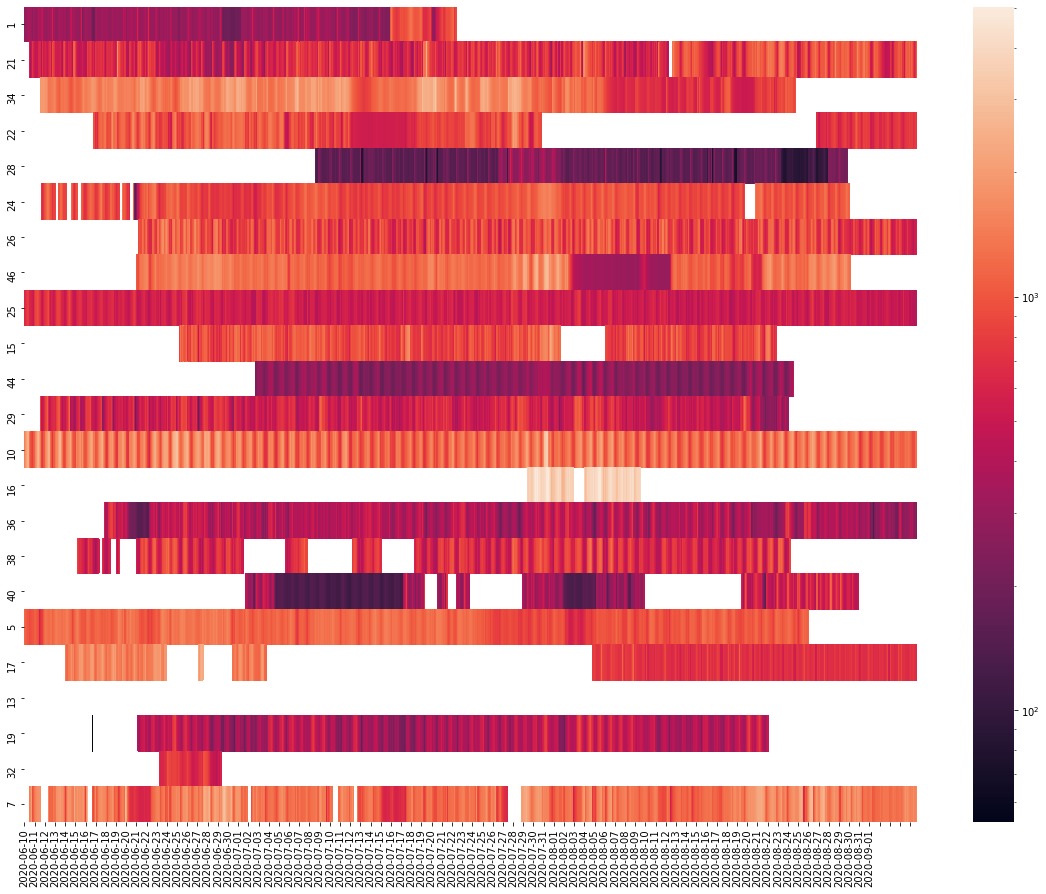

Working for CO
	Data collected
	Plotting


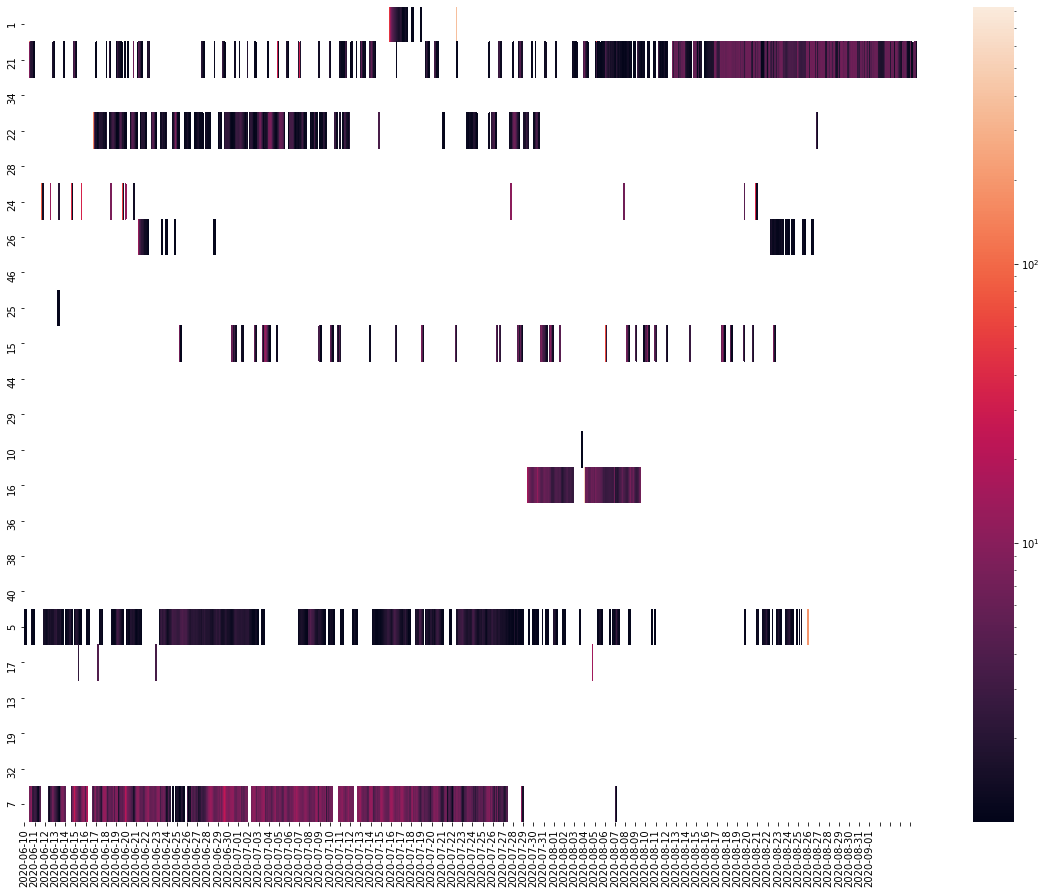

Working for NO2
	Data collected
	Plotting


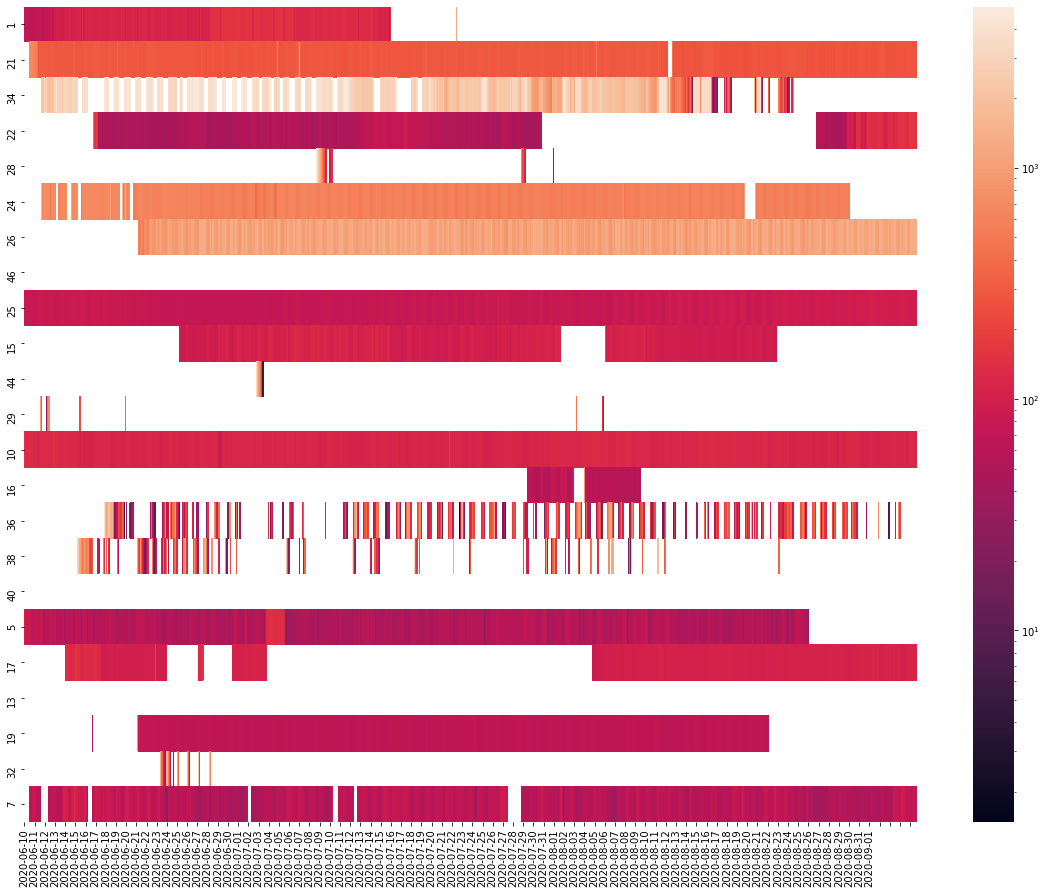

Working for T_NO2
	Data collected
	Plotting


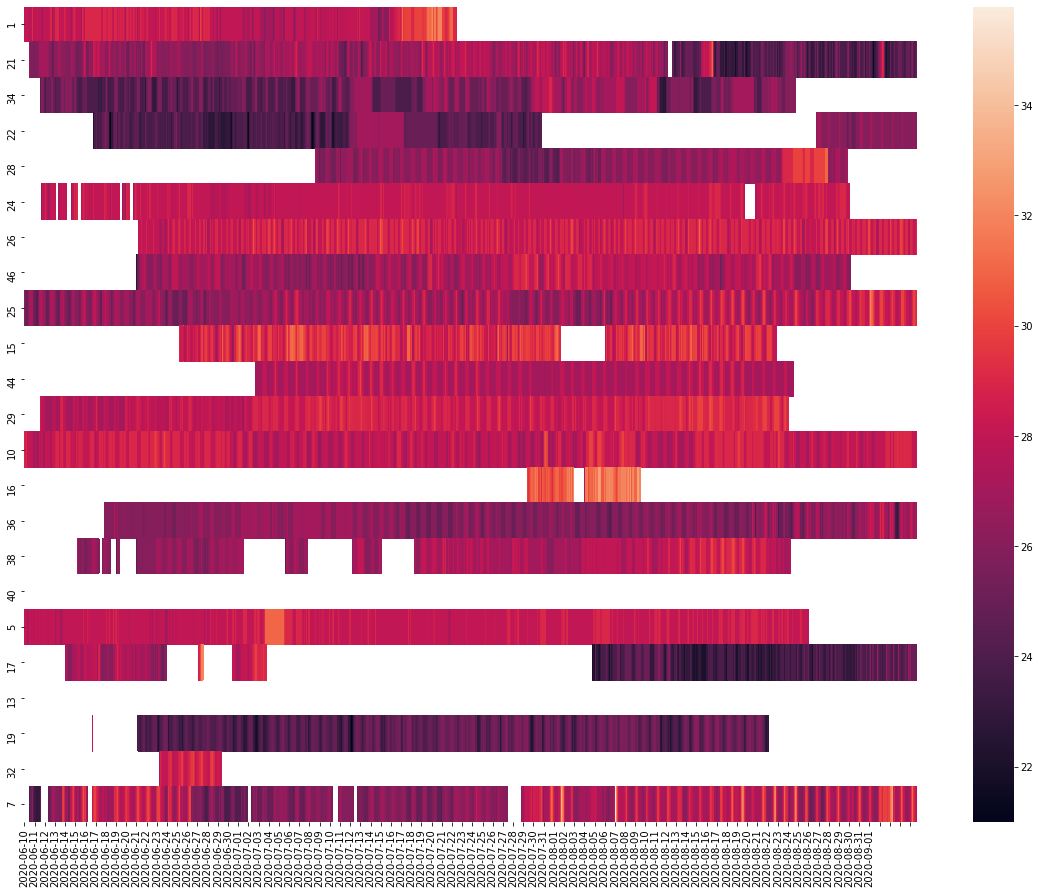

In [54]:
var_list = ['PM_C_2p5','CO2','CO','NO2','T_NO2']
limit_list = [[1,75],[1,2000],[1,20],[1,100],[1,50]]
for variable, limits in zip(var_list, limit_list):
    print(f'Working for {variable}')
    heatmap_df = pd.DataFrame()
    for beacon in beacon_data['Beacon'].unique():
        data_by_beacon = beacon_data[beacon_data['Beacon'] == beacon]
        data_by_beacon = data_by_beacon[data_by_beacon[variable] > 1]
        if variable == 'NO2':
            data_by_beacon = data_by_beacon[data_by_beacon[variable] < 5000]
        data_by_beacon = data_by_beacon.resample('1h').mean()
        sdate = datetime(2020,6,10)
        edate = datetime(2020,9,2)
        data_by_beacon = data_by_beacon[sdate:edate]
        heatmap_df = pd.concat([heatmap_df,data_by_beacon[variable]],axis=1)
        heatmap_df.rename(columns={variable:beacon}, inplace=True)

    print(f'\tData collected')
    fig, ax = plt.subplots(figsize=(20,15))
    df_to_plot = heatmap_df.T
    print(f'\tPlotting')
    if variable[0] == 'T':
        sns.heatmap(df_to_plot,vmin=np.nanmin(df_to_plot),vmax=np.nanmax(df_to_plot))
    else:
        sns.heatmap(df_to_plot,norm=LogNorm(vmin=np.nanmin(df_to_plot),vmax=np.nanmax(df_to_plot)))
        
    x_labels = []
    for d in pd.date_range(sdate,edate-timedelta(days=1),freq='d'):
        x_labels.append(d.date())
        
    ax.set_xticklabels(x_labels)
    
    plt.show()
    plt.close()